# 1. IMPORT PACKAGE

In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2. IMPORT DATA OP BANGUNAN DAN DATA OBJEK PAJAK

**A. Import dan menampilkan info data OP Pajak**

In [2]:
data_op = pd.read_csv('C:/Users/ASUS/Documents/Sabila Haq/Junior DS/Data_24-10-2022/DAT_OBJEK_PAJAK_202209151001.csv', sep='|')
data_op.info()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_2236\1017265348.py:1: DtypeWarning: Columns (6,8,12,13,21,29) have mixed types. Specify dtype option on import or set low_memory=False.
  data_op = pd.read_csv('C:/Users/ASUS/Documents/Sabila Haq/Junior DS/Data_24-10-2022/DAT_OBJEK_PAJAK_202209151001.csv', sep='|')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2237425 entries, 0 to 2237424
Data columns (total 31 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   KD_PROPINSI         int64 
 1   KD_DATI2            int64 
 2   KD_KECAMATAN        int64 
 3   KD_KELURAHAN        int64 
 4   KD_BLOK             int64 
 5   NO_URUT             int64 
 6   KD_JNS_OP           object
 7   SUBJEK_PAJAK_ID     object
 8   NO_FORMULIR_SPOP    object
 9   NO_PERSIL           object
 10  JALAN_OP            object
 11  BLOK_KAV_NO_OP      object
 12  RW_OP               object
 13  RT_OP               object
 14  KD_STATUS_CABANG    int64 
 15  KD_STATUS_WP        int64 
 16  TOTAL_LUAS_BUMI     int64 
 17  TOTAL_LUAS_BNG      int64 
 18  NJOP_BUMI           int64 
 19  NJOP_BNG            int64 
 20  STATUS_PETA_OP      int64 
 21  JNS_TRANSAKSI_OP    object
 22  TGL_PENDATAAN_OP    object
 23  NIP_PENDATA         int64 
 24  TGL_PEMERIKSAAN_OP  object
 25  NIP_PEMERIKSA_OP  

**B. Import dan menampilkan info data OP Bangunan *cut off* 15 September 2022**

In [3]:
op_bang = pd.read_csv('C:/Users/ASUS/Documents/Sabila Haq/Junior DS/Data_06-10-2022/OP_BANGUNAN_20220915.csv')
op_bang.info()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_2236\2762711229.py:1: DtypeWarning: Columns (12,23,30) have mixed types. Specify dtype option on import or set low_memory=False.
  op_bang = pd.read_csv('C:/Users/ASUS/Documents/Sabila Haq/Junior DS/Data_06-10-2022/OP_BANGUNAN_20220915.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2072586 entries, 0 to 2072585
Data columns (total 31 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   OBJECTID                    int64  
 1   Jml_Lantai_Bng              int64  
 2   Jns_Atap_Bng                float64
 3   Jns_Konstruksi_Bng          float64
 4   Jns_Transaksi_Bng           int64  
 5   Kd_Blok                     int64  
 6   Kd_Dati2                    int64  
 7   Kd_Dinding                  float64
 8   Kd_Jns_Op                   int64  
 9   Kd_Jpb                      int64  
 10  Kd_Kecamatan                int64  
 11  Kd_Kelurahan                int64  
 12  Kd_Langit_Langit            object 
 13  Kd_Lantai                   float64
 14  Kd_Propinsi                 int64  
 15  Kd_Unit                     float64
 16  Kondisi_Bng                 int64  
 17  Luas_Bng                    int64  
 18  Nilai_Sistem_Bng            float64
 19  Nip_Pemeriksa_Bng    

# 3. SUBSET DAN DEFINE DATA OP BANGUNAN SERTA DATA OP PAJAK

**A. Subset dan exclude outlier data jumlah lantai**

In [ ]:
op_bang = op_bang[['NOP', 'Jml_Lantai_Bng', 'Luas_Bng', 'Nilai_Sistem_Bng', 'Jns_Atap_Bng', 'Jns_Konstruksi_Bng', 'Jns_Transaksi_Bng', 'Kd_Dinding', 'Kd_Jpb', 'Kd_Langit_Langit', 'Kd_Lantai', 'Kondisi_Bng']]

# Cut Outlier Jml_Lantai_Bng
op_bang = op_bang[op_bang['Jml_Lantai_Bng']<=69]
op_bang

**B. Define variable jenis atap bangunan**

In [5]:
atap = {1 : 'A. Decrabon/Beton/Gtg Glazur',
                  2 : 'A. Gtg. Beton/Alumunium',
                  3 : 'A. Gtg. Biasa/Sirap',
                  4 : 'A. Asbes',
                  5 : 'A. Seng'
                 }
op_bang = op_bang.replace({'Jns_Atap_Bng' : atap})
op_bang['Jns_Atap_Bng'] = np.where(pd.to_numeric(op_bang['Jns_Atap_Bng'], errors='coerce').notnull(), 'A. Anomaly', op_bang['Jns_Atap_Bng'])

op_bang['Jns_Atap_Bng'].value_counts().sort_values()

A. Anomaly                           23
A. Seng                           60701
A. Asbes                         252644
A. Gtg. Beton/Alumunium          349621
A. Decrabon/Beton/Gtg Glazur     356549
A. Gtg. Biasa/Sirap             1039381
Name: Jns_Atap_Bng, dtype: int64

In [6]:
op_bang['Jns_Atap_Bng'].isnull().sum()

13605

**C. Define variable jenis kontruksi bangunan**

In [7]:
kontruk = {1 : 'B. Baja',
                  2 : 'B. Beton',
                  3 : 'B. Batu Bata',
                  4 : 'B. Kayu'
                 }
op_bang = op_bang.replace({'Jns_Konstruksi_Bng' : kontruk})
op_bang['Jns_Konstruksi_Bng'] = np.where(pd.to_numeric(op_bang['Jns_Konstruksi_Bng'], errors='coerce').notnull(), 'B. Anomaly', op_bang['Jns_Konstruksi_Bng'])

op_bang['Jns_Konstruksi_Bng'].value_counts().sort_values()

B. Anomaly        14698
B. Baja           64483
B. Kayu          101048
B. Batu Bata     641843
B. Beton        1236822
Name: Jns_Konstruksi_Bng, dtype: int64

In [8]:
op_bang['Jns_Konstruksi_Bng'].isnull().sum()

13630

**D. Define variable jenis transaksi bangunan**

In [9]:
trans = {1 : 'C. Perekaman Data',
                  2 : 'C. Pemutakhiran Data',
                  3 : 'C. Penghapusan Data',
                  4 : 'C. Penilaian Individu'
                 }
op_bang = op_bang.replace({'Jns_Transaksi_Bng' : trans})
op_bang['Jns_Transaksi_Bng'] = np.where(pd.to_numeric(op_bang['Jns_Transaksi_Bng'], errors='coerce').notnull(), 'C. Anomaly', op_bang['Jns_Transaksi_Bng'])

op_bang['Jns_Transaksi_Bng'].value_counts().sort_values()

C. Anomaly                    1
C. Pemutakhiran Data     890377
C. Perekaman Data       1182146
Name: Jns_Transaksi_Bng, dtype: int64

In [10]:
op_bang['Jns_Transaksi_Bng'].isnull().sum()

0

**E. Define variable dinding**

In [11]:
din = {1 : 'D. Kaca Alumunium',
         2 : 'D. Pemutakhiran Beton',
         3 : 'D. Batu Bata/Conblok',
         4 : 'D. Kayu',
         5 : 'D. Seng'
                 }
op_bang = op_bang.replace({'Kd_Dinding' : din})
op_bang['Kd_Dinding'] = np.where(pd.to_numeric(op_bang['Kd_Dinding'], errors='coerce').notnull(), 'D. Anomaly', op_bang['Kd_Dinding'])

op_bang['Kd_Dinding'].value_counts().sort_values()

D. Seng                     4292
D. Anomaly                 27478
D. Kaca Alumunium          77244
D. Kayu                    83890
D. Pemutakhiran Beton     155645
D. Batu Bata/Conblok     1710330
Name: Kd_Dinding, dtype: int64

In [12]:
op_bang['Kd_Dinding'].isnull().sum()

13645

**F. Define variable jenis penggunaan bangunan**

In [13]:
jpb = {1 : 'Perumahan', 2 : 'Perkantoran Swasta',
       3 : 'Pabrik', 4 : 'Toko/Apotik/Pasar/Ruko',
       5 : 'Rumah Sakit/Klinik', 6 : 'Olahrag/Rekreasi',
       7 : 'Hotel/Wisma/Resto', 8 : 'Bengkel/Gudang/Pertanian',
       9 : 'Gedung Pemerintah', 10 : 'Lain-lain',
       11 : 'Bangunan Tdk Kena Pajak', 12 : 'Bangunan Parkir',
       13 : 'Apartemen Strata Title', 14 : 'Rumah Susun',
       15 : 'SPBU dan Sejenisnya', 16 : 'Tempat Penampungan/Kilang Minyak, Air, Gas, dan Pipa Minyak',
       17 : 'Gedung Sekolah', 18 : 'Tower dan Sejenisnya',
       19 : 'Jalan Tol dan Sejenisnya', 20 : 'Perguruan Tinggi',
       21 : 'Menara', 22 : 'Kolam Renang',
       23 : 'Galangan Kapal/Dermaga', 24 : 'Taman Mewah',
       25 : 'Jalan lingkungan yang terletak dalam satu kompleks bangunan seperti hotel, pabrik, dan emplasemennya yang merupakan satu kesatuan dengan kompleks bangunan tersebut'
                 }
op_bang = op_bang.replace({'Kd_Jpb' : jpb})
op_bang['Kd_Jpb'] = np.where(pd.to_numeric(op_bang['Kd_Jpb'], errors='coerce').notnull(), 'E. Anomaly', op_bang['Kd_Jpb'])

op_bang['Kd_Jpb'].value_counts().sort_values()

Gedung Sekolah                                                      18
E. Anomaly                                                          96
Rumah Susun                                                        405
Olahrag/Rekreasi                                                   482
Rumah Sakit/Klinik                                                 787
Gedung Pemerintah                                                  972
Bangunan Parkir                                                   1136
SPBU dan Sejenisnya                                               1316
Tempat Penampungan/Kilang Minyak, Air, Gas, dan Pipa Minyak       1690
Hotel/Wisma/Resto                                                 2006
Pabrik                                                            6996
Lain-lain                                                         9380
Bengkel/Gudang/Pertanian                                          9670
Bangunan Tdk Kena Pajak                                          11237
Perkan

In [14]:
op_bang['Kd_Jpb'].isnull().sum()

0

**G. Define variable langit-langit**

In [15]:
langit = {1 : 'F. Akustik/Jati',
          2 : 'F. Triplek/Asbes Bambu',
          3 : 'F. Tidak Ada',
          '1' : 'F. Akustik/Jati',
          '2' : 'F. Triplek/Asbes Bambu',
          '3' : 'F. Tidak Ada',
          '-' : 'F. Anomaly'
         }
op_bang = op_bang.replace({'Kd_Langit_Langit' : langit})
op_bang['Kd_Langit_Langit'] = np.where(pd.to_numeric(op_bang['Kd_Langit_Langit'], errors='coerce').notnull(), 'F. Anomaly', op_bang['Kd_Langit_Langit'])

op_bang['Kd_Langit_Langit'].value_counts().sort_values()

F. Anomaly                   3125
F. Tidak Ada               143021
F. Akustik/Jati            270317
F. Triplek/Asbes Bambu    1642408
Name: Kd_Langit_Langit, dtype: int64

In [16]:
op_bang['Kd_Langit_Langit'].isnull().sum()

13653

**H. Define variable lantai**

In [17]:
op_bang[['Kd_Lantai']].value_counts().sort_index()

Kd_Lantai
0.0               23
1.0           100358
2.0          1237742
3.0           169021
4.0           338929
5.0           212900
6.0               65
dtype: int64

In [18]:
lantai = {1 : 'G. Marmer', 2 : 'G. Keramik',
          3 : 'G. Teraso', 4 : 'G. Ubin PC/Papan',
          5 : 'G. Semen'
         }
op_bang = op_bang.replace({'Kd_Lantai' : lantai})
op_bang['Kd_Lantai'] = np.where(pd.to_numeric(op_bang['Kd_Lantai'], errors='coerce').notnull(), 'G. Anomaly', op_bang['Kd_Lantai'])

op_bang['Kd_Lantai'].value_counts().sort_values()

G. Anomaly               88
G. Marmer            100358
G. Teraso            169021
G. Semen             212900
G. Ubin PC/Papan     338929
G. Keramik          1237742
Name: Kd_Lantai, dtype: int64

In [19]:
op_bang['Kd_Lantai'].isnull().sum()

13486

**I. Define variable kondisi bangunan**

In [20]:
op_bang[['Kondisi_Bng']].value_counts().sort_index()

Kondisi_Bng
0                  23
1              338105
2              960111
3              690121
4               84164
dtype: int64

In [21]:
kon = {1 : 'Sangat Baik', 2 : 'Baik',
       3 : 'Sedang', 4 : 'Jelek'
      }
op_bang = op_bang.replace({'Kondisi_Bng' : kon})
op_bang['Kondisi_Bng'] = np.where(pd.to_numeric(op_bang['Kondisi_Bng'], errors='coerce').notnull(), 'H. Anomaly', op_bang['Kondisi_Bng'])

op_bang['Kondisi_Bng'].value_counts().sort_values()

H. Anomaly         23
Jelek           84164
Sangat Baik    338105
Sedang         690121
Baik           960111
Name: Kondisi_Bng, dtype: int64

In [22]:
op_bang['Kondisi_Bng'].isnull().sum()

0

**J. Subset data OP Pajak**

In [ ]:
data_op = data_op[['NOP', 'NJOP_BNG']]
data_op_1 = data_op.drop_duplicates(subset=['NOP'], keep=False)
data_op_1

# 4. PEMBUATAN DUMMY VALUE

**A. Pembuatan dummy value dan penghapusan anomaly value**

In [24]:
dumm_atap = pd.get_dummies(op_bang['Jns_Atap_Bng'])
dumm_atap = dumm_atap.drop(['A. Anomaly'], axis=1)

dumm_kon = pd.get_dummies(op_bang['Jns_Konstruksi_Bng'])
dumm_kon = dumm_kon.drop(['B. Anomaly'], axis=1)

dumm_trans = pd.get_dummies(op_bang['Jns_Transaksi_Bng'])
dumm_trans = dumm_trans.drop(['C. Anomaly'], axis=1)

dumm_din = pd.get_dummies(op_bang['Kd_Dinding'])
dumm_din = dumm_din.drop(['D. Anomaly'], axis=1)

dumm_jpb = pd.get_dummies(op_bang['Kd_Jpb'])
dumm_jpb = dumm_jpb.drop(['E. Anomaly'], axis=1)

dumm_lang = pd.get_dummies(op_bang['Kd_Langit_Langit'])
dumm_lang = dumm_lang.drop(['F. Anomaly'], axis=1)

dumm_lan = pd.get_dummies(op_bang['Kd_Lantai'])
dumm_lan = dumm_lan.drop(['G. Anomaly'], axis=1)

dumm_kond = pd.get_dummies(op_bang['Kondisi_Bng'])
dumm_kond = dumm_kond.drop(['H. Anomaly'], axis=1)

**B. Penggabungan, penyusunan, dan penghapusan data OP Bangunan dengan variable dummy**

In [ ]:
df = pd.concat([op_bang,
                dumm_atap,
                dumm_kon,
                dumm_trans,
                dumm_din,
                dumm_jpb,
                dumm_lang,
                dumm_lan,
                dumm_kond], axis=1)
df

In [ ]:
df = df.drop(['Jns_Atap_Bng', 'Jns_Konstruksi_Bng',
              'Jns_Transaksi_Bng', 'Kd_Dinding',
              'Kd_Jpb', 'Kd_Langit_Langit',
              'Kd_Lantai', 'Kondisi_Bng'], axis=1)
df

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2072524 entries, 0 to 2072523
Data columns (total 49 columns):
 #   Column                                                       Dtype  
---  ------                                                       -----  
 0   NOP                                                          object 
 1   Jml_Lantai_Bng                                               int64  
 2   Luas_Bng                                                     int64  
 3   Nilai_Sistem_Bng                                             float64
 4   A. Asbes                                                     uint8  
 5   A. Decrabon/Beton/Gtg Glazur                                 uint8  
 6   A. Gtg. Beton/Alumunium                                      uint8  
 7   A. Gtg. Biasa/Sirap                                          uint8  
 8   A. Seng                                                      uint8  
 9   B. Baja                                                      uint8  

# 5. JOIN NJOP OP BANGUNAN DENGAN SPPT DAN OP PAJAK

**A. Import data SPPT**

In [27]:
sppt = pd.read_csv('C:/Users/ASUS/Documents/Sabila Haq/Junior DS/Data_06-10-2022/SPPT_2022_220915.csv', sep=',')
sppt.info()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_1292\2986310592.py:1: DtypeWarning: Columns (0,13,14,15,29,36,37) have mixed types. Specify dtype option on import or set low_memory=False.
  sppt = pd.read_csv('C:/Users/ASUS/Documents/Sabila Haq/Junior DS/Data_06-10-2022/SPPT_2022_220915.csv', sep=',')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2036318 entries, 0 to 2036317
Data columns (total 51 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Blok Kav No Wp Sppt          object 
 1   Buku                         int64  
 2   Faktor Pengurang Sppt        float64
 3   Jln Wp Sppt                  object 
 4   Jml Byr                      float64
 5   KEY                          object 
 6   Kd Blok                      int64  
 7   Kd Dati2                     int64  
 8   Kd Jns Op                    int64  
 9   Kd Kantor                    float64
 10  Kd Kanwil                    float64
 11  Kd Kecamatan                 int64  
 12  Kd Kelurahan                 int64  
 13  Kd Kls Bng                   object 
 14  Kd Kls Tanah                 object 
 15  Kd Pos Wp Sppt               object 
 16  Kd Propinsi                  int64  
 17  Kd Tp                        float64
 18  Kelurahan Wp Sppt            object 
 19  

**B. Subset data SPPT**

In [ ]:
sppt_1 = sppt[['NOP', 'Njop Bng Sppt']]
sppt_1

**C. Pengecekan duplikasi NOP pada data SPPT**

In [29]:
sppt_1[sppt_1.duplicated(subset=['NOP'], keep=False)]
#TIDAK ADA DUPLICATE NOP

,NOP,Njop Bng Sppt


**D. Join data OP Bangunan dan data SPPT dengan key NOP**

In [30]:
df2 = pd.merge(df, sppt_1, on = 'NOP', how='left')
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2072524 entries, 0 to 2072523
Data columns (total 50 columns):
 #   Column                                                       Dtype  
---  ------                                                       -----  
 0   NOP                                                          object 
 1   Jml_Lantai_Bng                                               int64  
 2   Luas_Bng                                                     int64  
 3   Nilai_Sistem_Bng                                             float64
 4   A. Asbes                                                     uint8  
 5   A. Decrabon/Beton/Gtg Glazur                                 uint8  
 6   A. Gtg. Beton/Alumunium                                      uint8  
 7   A. Gtg. Biasa/Sirap                                          uint8  
 8   A. Seng                                                      uint8  
 9   B. Baja                                                      uint8  

**E. Pengecekan NJOP yang belum ditemukan dari hasil join**

In [ ]:
df2[df2['Njop Bng Sppt'].isnull()]

**F. Join data hasil join pertama dengan data OP Pajak**

In [32]:
df3 = pd.merge(df2, data_op_1, on = 'NOP', how='left')
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2072524 entries, 0 to 2072523
Data columns (total 51 columns):
 #   Column                                                       Dtype  
---  ------                                                       -----  
 0   NOP                                                          object 
 1   Jml_Lantai_Bng                                               int64  
 2   Luas_Bng                                                     int64  
 3   Nilai_Sistem_Bng                                             float64
 4   A. Asbes                                                     uint8  
 5   A. Decrabon/Beton/Gtg Glazur                                 uint8  
 6   A. Gtg. Beton/Alumunium                                      uint8  
 7   A. Gtg. Biasa/Sirap                                          uint8  
 8   A. Seng                                                      uint8  
 9   B. Baja                                                      uint8  

**G. Filling NJOP kosong dari hasil join SPPT dan OP Pajak*

In [ ]:
null_join = df3[(df3['Njop Bng Sppt'].isnull())&(df3['NJOP_BNG'].isnull())]
print('Jumlah NJOP NULL Setelah Join = ', len(null_join.index))
null_join

In [ ]:
df3['NJOP'] = df3['Njop Bng Sppt']
df3['NJOP'] = np.where(df3['NJOP'].isnull(), df3['NJOP_BNG'], df3['NJOP'])
df3

In [ ]:
null_join = df3[df3['NJOP'].isnull()]
print('Jumlah NJOP NULL Setelah Join = ', len(null_join.index))
null_join

In [ ]:
df3 = df3.drop(['Njop Bng Sppt', 'NJOP_BNG'], axis=1)
df3

# 6. EXCLUDE DATA OUTLIER

**A. Exclude data NJOP kosong**

In [ ]:
df3 = df3[df3['NJOP'].notnull()]
df3['NJOP'] = df3['NJOP'].astype('Int64')
df3 = df3[df3['NJOP']!=0]
df3

**B. Exclude outlier variable NJOP**

In [38]:
NJOP = df3['NJOP']

def detect_outliers(NJOP):
    Q1 = NJOP.describe()['25%']
    Q3 = NJOP.describe()['75%']
    IQR = Q3-Q1
    return NJOP[(NJOP < Q1-1.5*IQR) | (NJOP > Q3+1.5*IQR)]

outliers = detect_outliers(NJOP)
print('jumlah outliers =', str(len(outliers)))
print('Nilai outlier maksimum =', str(outliers.max()))
print('Nilai outlier minimum =', str(outliers.min()))
outliers

jumlah outliers = 191478
Nilai outlier maksimum = 8177971550000
Nilai outlier minimum = 588000000


186          3302375000
1586         1213800000
4991        12053808000
5111        52582800000
5283         1218000000
               ...     
2072510      2939525000
2072511      2939525000
2072512      2939525000
2072513      2939525000
2072516    973144250000
Name: NJOP, Length: 191478, dtype: Int64

In [ ]:
import numpy as np

Q1 = np.quantile(df3['NJOP'], .25)
Q3 = np.quantile(df3['NJOP'], .75)
IQR = Q3-Q1

df3 = df3[~((df3['NJOP'] < (Q1 - 1.5 * IQR)) |(df3['NJOP'] > (Q3 + 1.5 * IQR)))]
df3

# 7. EDA UNTUK MELIHAT HUBUNGAN NJOP BANGUNAN DENGAN VARIABLE LAIN

**A. EDA hubungan NJOP dan luas bangunan dalam bentuk scatter plot**

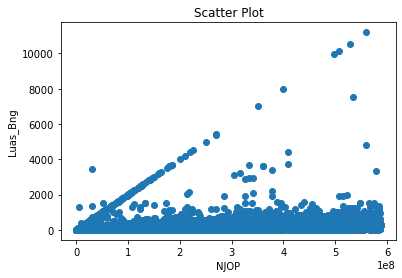

In [41]:
plt.scatter(df3['NJOP'], df3['Luas_Bng'])
plt.xlabel('NJOP')
plt.ylabel('Luas_Bng')
plt.title('Scatter Plot')
plt.show()

**B. Korelasi semua variable dalam bentuk heatmap correlation**

<AxesSubplot:>

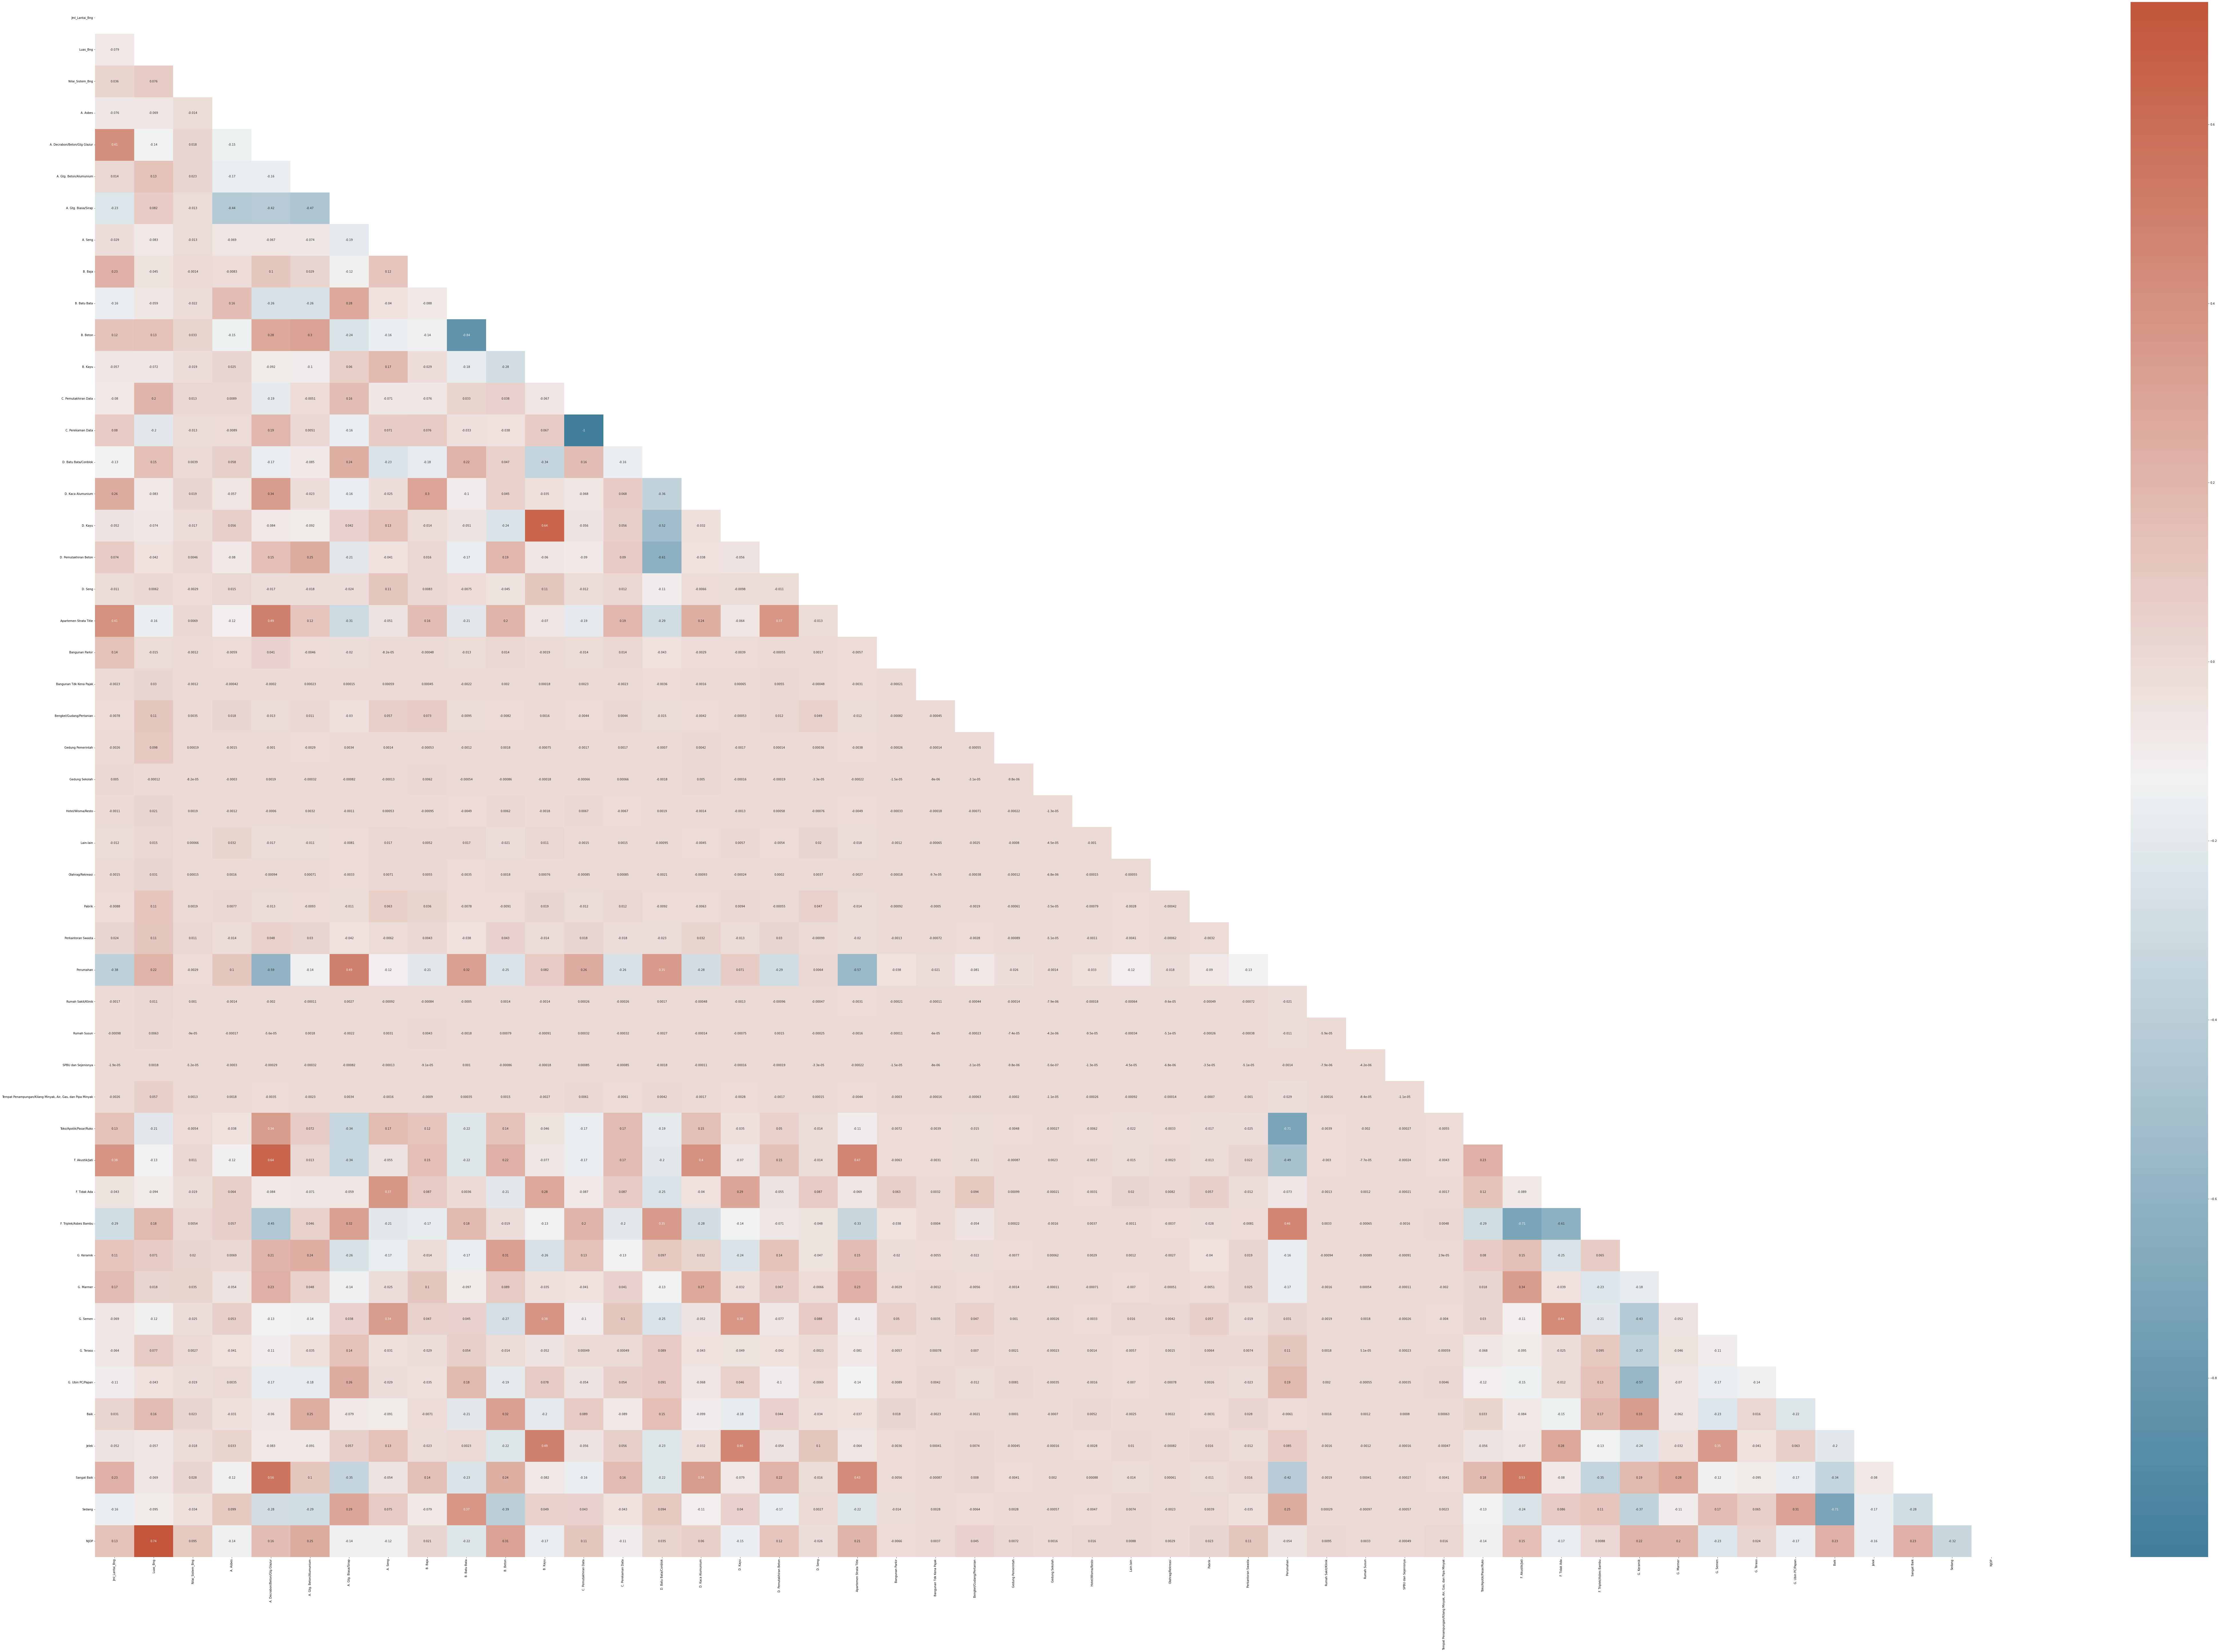

In [45]:
cor = df3.corr()

# Set up the matplotlib plot configuration
f, ax = plt.subplots(figsize=(150, 100))

# Generate a mask for upper traingle
mask = np.triu(np.ones_like(cor, dtype=bool))

# Configure a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap
sns.heatmap(cor, annot=True, mask = mask, cmap=cmap)

#annot=True untuk menampilkan korelasi antar atribut. Jika nilai korelasi mendekati 1 maka hubungan antar atribut semakin tinggi

**C. Korelasi variable numerik dalam bentuk heatmap correlation**

In [46]:
df4 = df3[['NOP', 'Jml_Lantai_Bng', 'Luas_Bng', 'Nilai_Sistem_Bng', 'NJOP']]

<AxesSubplot:>

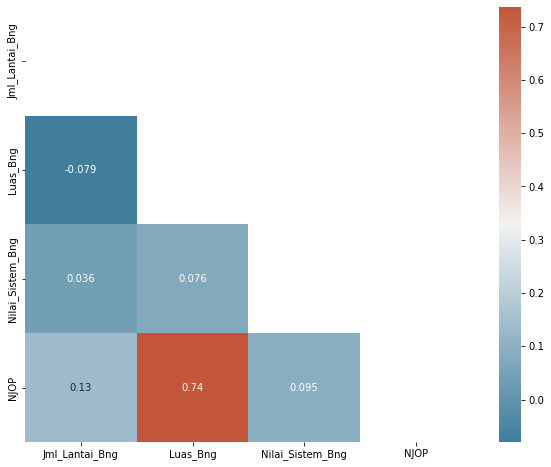

In [47]:
cir = df4.corr()

# Set up the matplotlib plot configuration
f, ax = plt.subplots(figsize=(10, 8))

# Generate a mask for upper traingle
mask = np.triu(np.ones_like(cir, dtype=bool))

# Configure a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap
sns.heatmap(cir, annot=True, mask = mask, cmap=cmap)

#annot=True untuk menampilkan korelasi antar atribut. Jika nilai korelasi mendekati 1 maka hubungan antar atribut semakin tinggi

**D. Korelasi variable NJOP dan atap dalam bentuk heatmap correlation**

<AxesSubplot:>

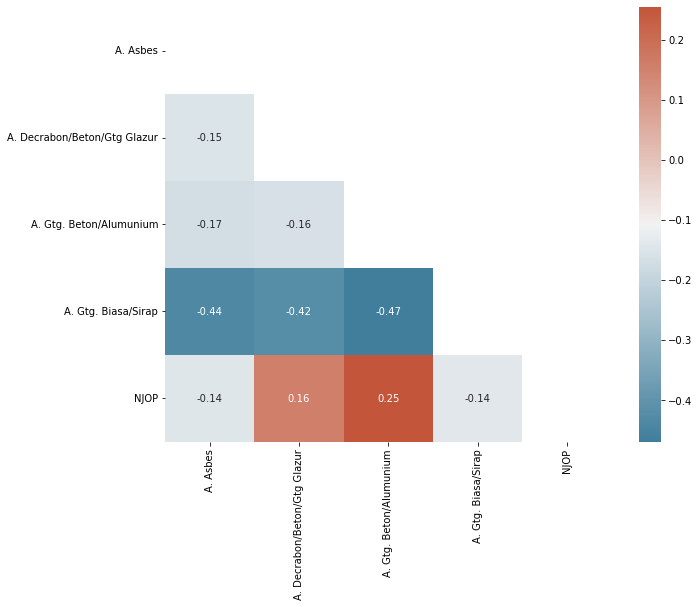

In [48]:
df_atap = df3[['A. Asbes', 'A. Decrabon/Beton/Gtg Glazur', 
              'A. Gtg. Beton/Alumunium', 'A. Gtg. Biasa/Sirap', 'NJOP']]

corr_atap = df_atap.corr()

# Set up the matplotlib plot configuration
f, ax = plt.subplots(figsize=(10, 8))

# Generate a mask for upper traingle
mask = np.triu(np.ones_like(corr_atap, dtype=bool))

# Configure a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr_atap, annot=True, mask = mask, cmap=cmap)

#annot=True untuk menampilkan korelasi antar atribut. Jika nilai korelasi mendekati 1 maka hubungan antar atribut semakin tinggi

**E. Korelasi variable NJOP dan kontruksi dalam bentuk heatmap correlation**

<AxesSubplot:>

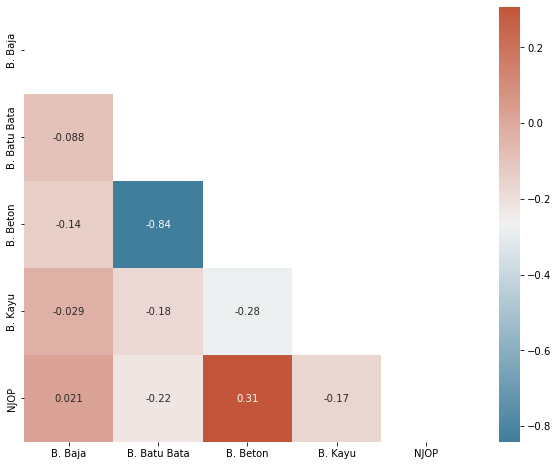

In [49]:
df_kon = df3[['B. Baja', 'B. Batu Bata', 
             'B. Beton', 'B. Kayu', 'NJOP']]

corr_kon = df_kon.corr()

# Set up the matplotlib plot configuration
f, ax = plt.subplots(figsize=(10, 8))

# Generate a mask for upper traingle
mask = np.triu(np.ones_like(corr_kon, dtype=bool))

# Configure a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr_kon, annot=True, mask = mask, cmap=cmap)

#annot=True untuk menampilkan korelasi antar atribut. Jika nilai korelasi mendekati 1 maka hubungan antar atribut semakin tinggi

**F. Korelasi variable NJOP dan transaksi dalam bentuk heatmap correlation**

<AxesSubplot:>

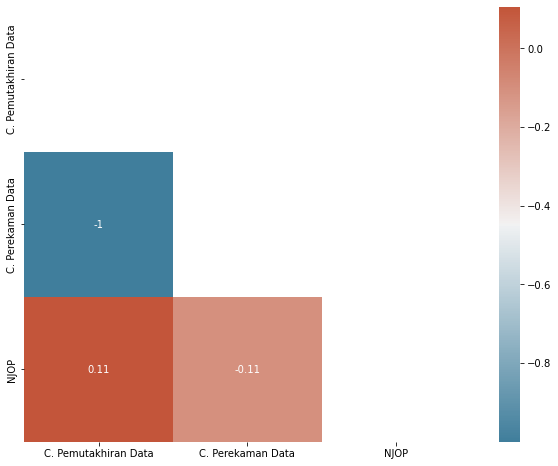

In [50]:
df_trans = df3[['C. Pemutakhiran Data', 'C. Perekaman Data', 'NJOP']]

corr_trans = df_trans.corr()

# Set up the matplotlib plot configuration
f, ax = plt.subplots(figsize=(10, 8))

# Generate a mask for upper traingle
mask = np.triu(np.ones_like(corr_trans, dtype=bool))

# Configure a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr_trans, annot=True, mask = mask, cmap=cmap)

#annot=True untuk menampilkan korelasi antar atribut. Jika nilai korelasi mendekati 1 maka hubungan antar atribut semakin tinggi

**G. Korelasi variable NJOP dan dinding dalam bentuk heatmap correlation**

<AxesSubplot:>

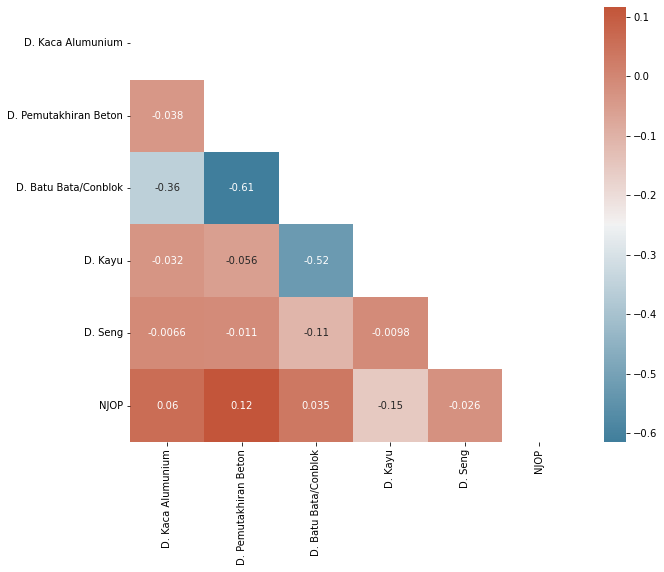

In [51]:
df_din = df3[['D. Kaca Alumunium', 'D. Pemutakhiran Beton',
              'D. Batu Bata/Conblok', 'D. Kayu', 'D. Seng', 'NJOP']]

corr_din = df_din.corr()

# Set up the matplotlib plot configuration
f, ax = plt.subplots(figsize=(10, 8))

# Generate a mask for upper traingle
mask = np.triu(np.ones_like(corr_din, dtype=bool))

# Configure a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr_din, annot=True, mask = mask, cmap=cmap)

#annot=True untuk menampilkan korelasi antar atribut. Jika nilai korelasi mendekati 1 maka hubungan antar atribut semakin tinggi

**H. Korelasi variable NJOP dan jenis penggunaan bangunan dalam bentuk heatmap correlation**

<AxesSubplot:>

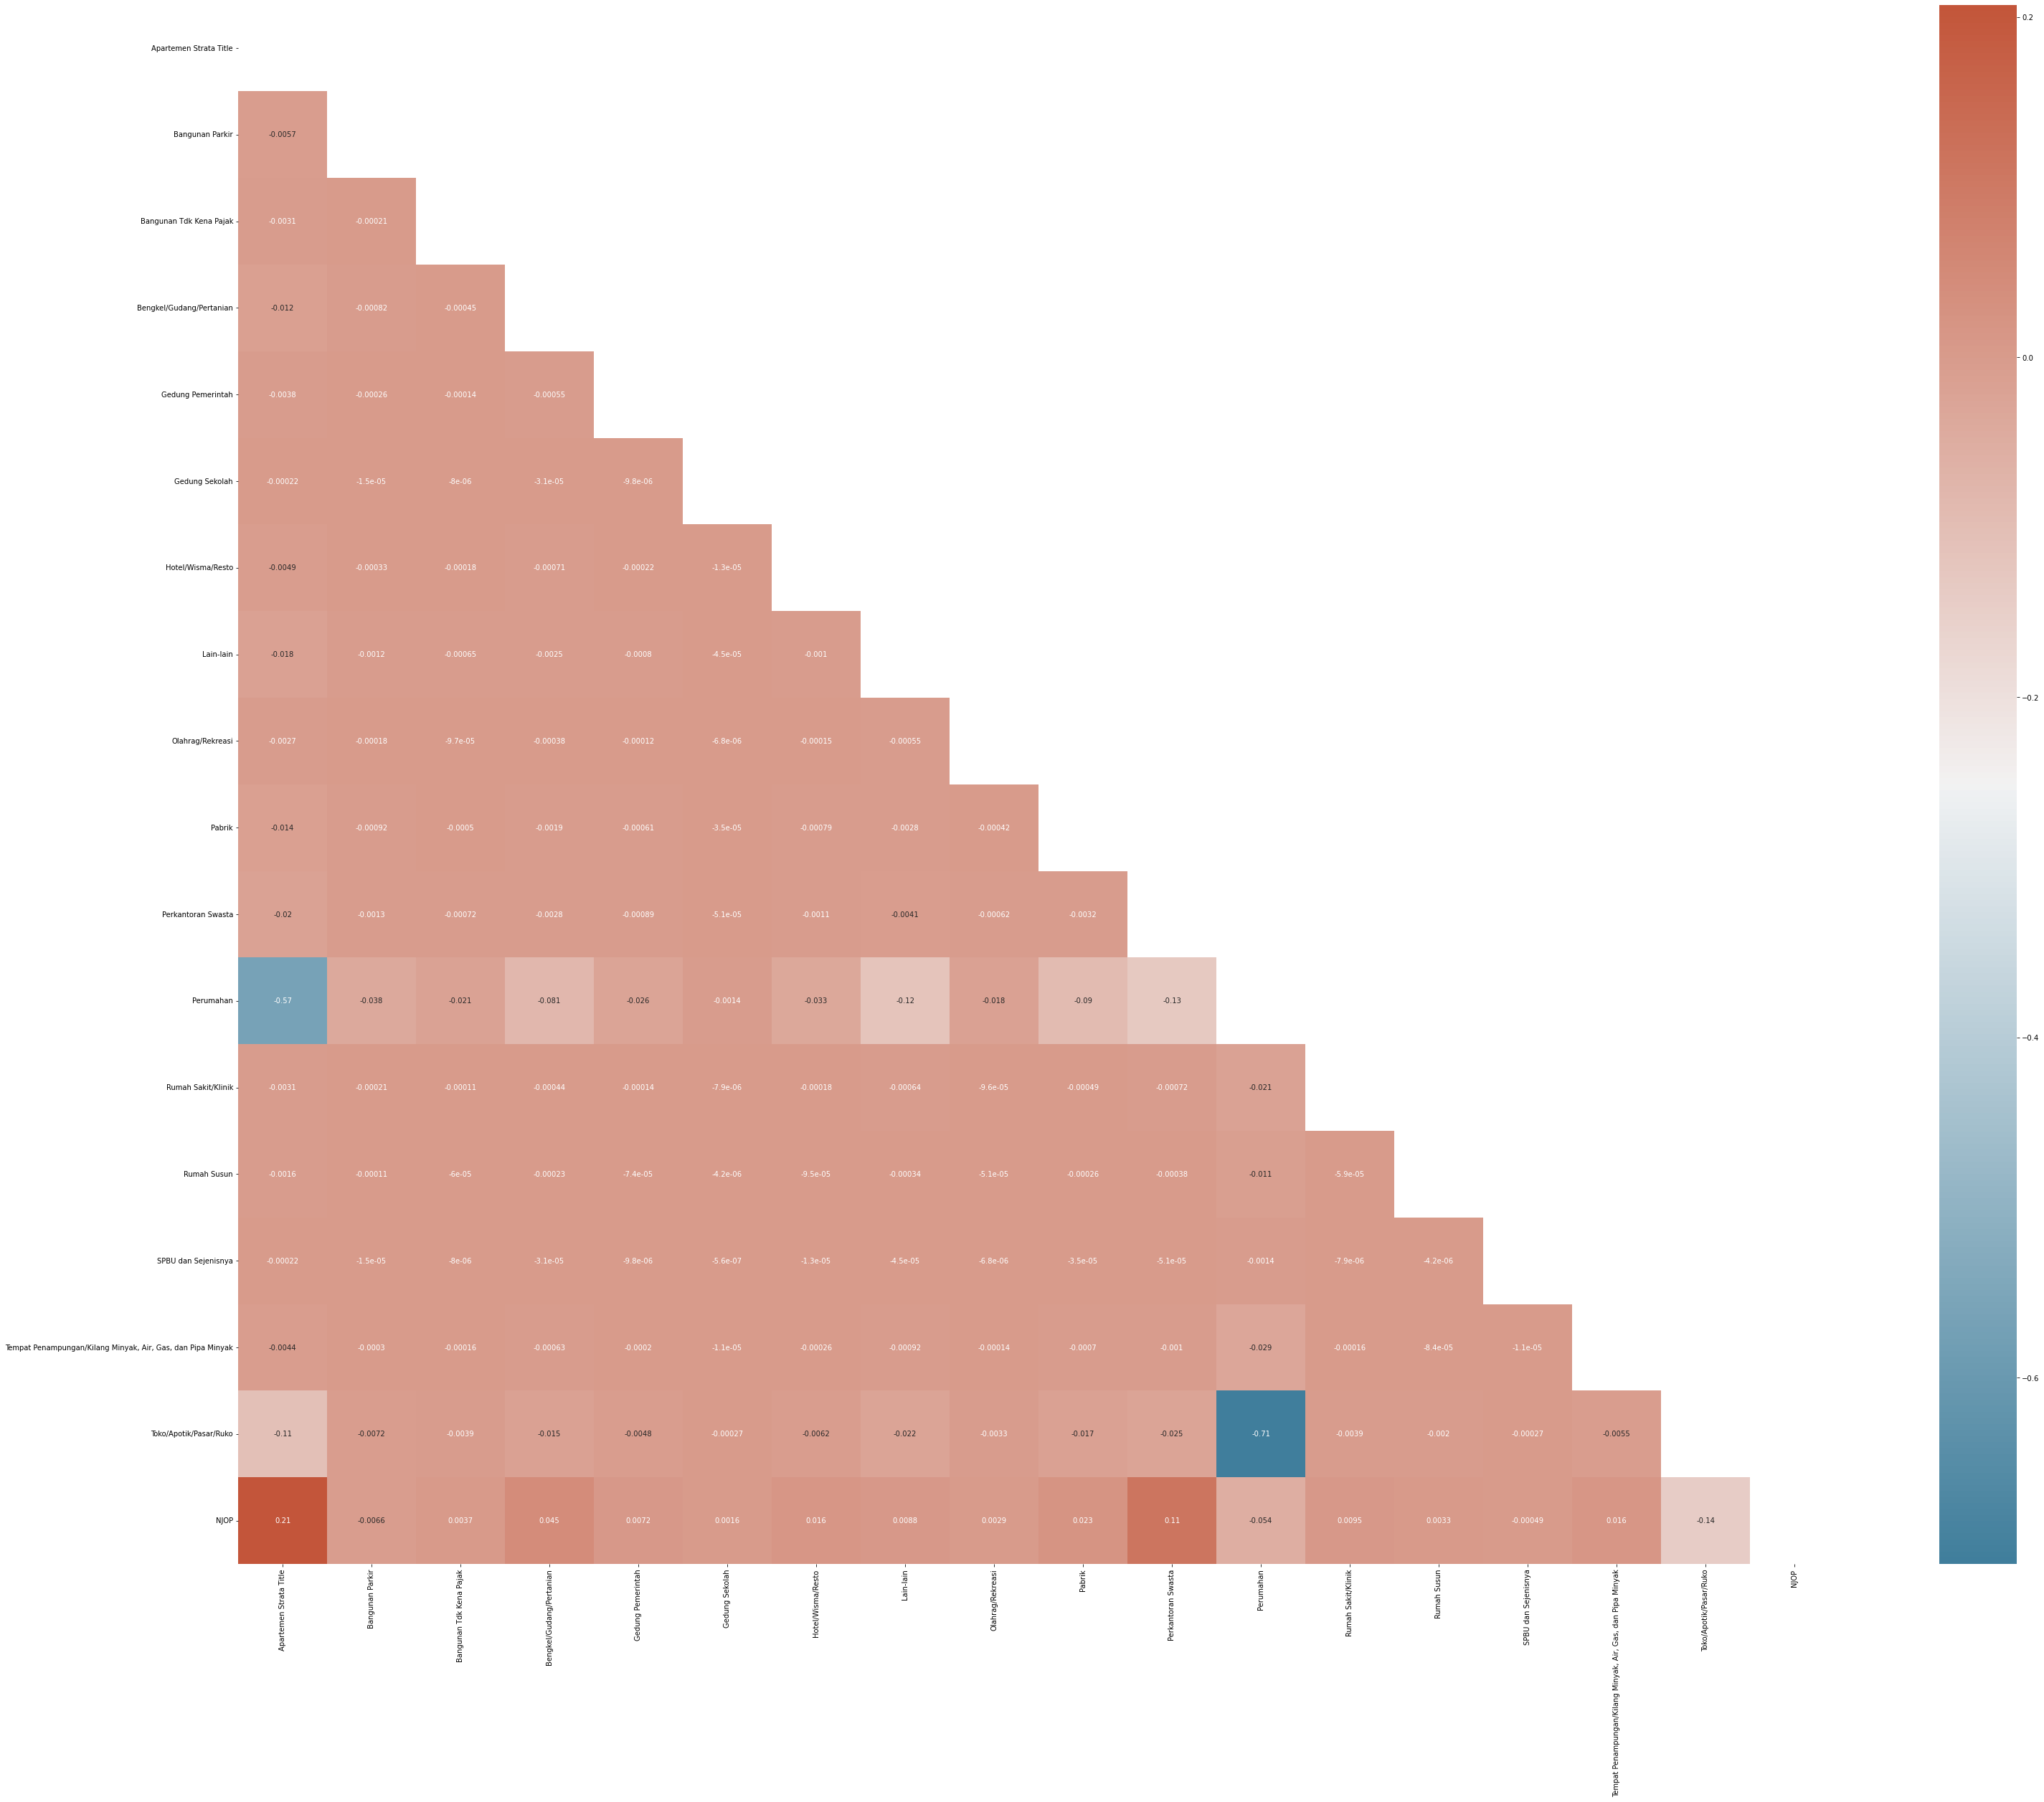

In [52]:
df_jpb = df3[['Apartemen Strata Title', 'Bangunan Parkir', 'Bangunan Tdk Kena Pajak',
              'Bengkel/Gudang/Pertanian', 'Gedung Pemerintah',
              'Gedung Sekolah', 'Hotel/Wisma/Resto',
              'Lain-lain', 'Olahrag/Rekreasi',
              'Pabrik', 'Perkantoran Swasta',
              'Perumahan', 'Rumah Sakit/Klinik',
              'Rumah Susun', 'SPBU dan Sejenisnya',
              'Tempat Penampungan/Kilang Minyak, Air, Gas, dan Pipa Minyak',
              'Toko/Apotik/Pasar/Ruko', 'NJOP']]

corr_jpb = df_jpb.corr()

# Set up the matplotlib plot configuration
f, ax = plt.subplots(figsize=(50, 40))

# Generate a mask for upper traingle
mask = np.triu(np.ones_like(corr_jpb, dtype=bool))

# Configure a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr_jpb, annot=True, mask = mask, cmap=cmap)

#annot=True untuk menampilkan korelasi antar atribut. Jika nilai korelasi mendekati 1 maka hubungan antar atribut semakin tinggi

**I. Korelasi variable NJOP dan langit-langit dalam bentuk heatmap correlation**

<AxesSubplot:>

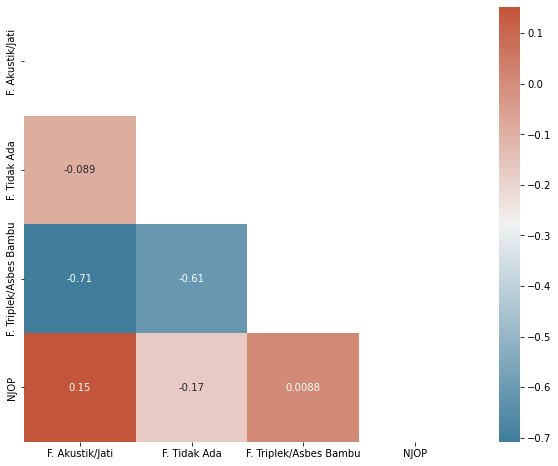

In [53]:
df_lang = df3[['F. Akustik/Jati', 'F. Tidak Ada', 
               'F. Triplek/Asbes Bambu', 'NJOP']]

corr_lang = df_lang.corr()

# Set up the matplotlib plot configuration
f, ax = plt.subplots(figsize=(10, 8))

# Generate a mask for upper traingle
mask = np.triu(np.ones_like(corr_lang, dtype=bool))

# Configure a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr_lang, annot=True, mask = mask, cmap=cmap)

#annot=True untuk menampilkan korelasi antar atribut. Jika nilai korelasi mendekati 1 maka hubungan antar atribut semakin tinggi

**J. Korelasi variable NJOP dan lantai dalam bentuk heatmap correlation**

<AxesSubplot:>

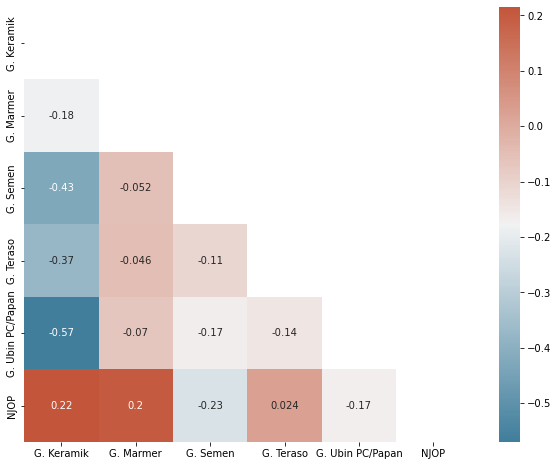

In [54]:
df_lan = df3[['G. Keramik', 'G. Marmer', 
              'G. Semen', 'G. Teraso', 'G. Ubin PC/Papan', 'NJOP']]

corr_lan = df_lan.corr()

# Set up the matplotlib plot configuration
f, ax = plt.subplots(figsize=(10, 8))

# Generate a mask for upper traingle
mask = np.triu(np.ones_like(corr_lan, dtype=bool))

# Configure a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr_lan, annot=True, mask = mask, cmap=cmap)

#annot=True untuk menampilkan korelasi antar atribut. Jika nilai korelasi mendekati 1 maka hubungan antar atribut semakin tinggi

**K. Korelasi variable NJOP dan kondisi bangunan dalam bentuk heatmap correlation**

<AxesSubplot:>

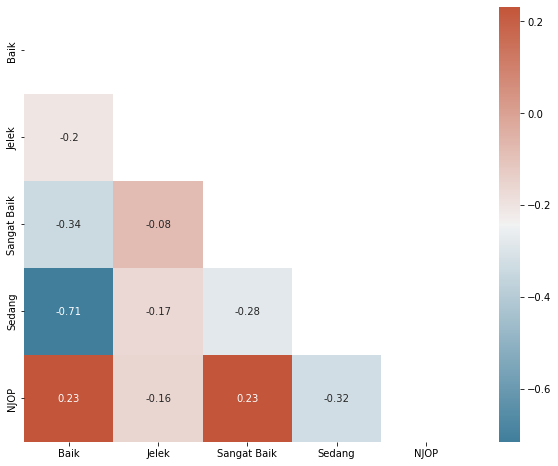

In [55]:
df_kond = df3[['Baik', 'Jelek', 'Sangat Baik', 'Sedang', 'NJOP']]

corr_kond = df_kond.corr()

# Set up the matplotlib plot configuration
f, ax = plt.subplots(figsize=(10, 8))

# Generate a mask for upper traingle
mask = np.triu(np.ones_like(corr_kond, dtype=bool))

# Configure a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr_kond, annot=True, mask = mask, cmap=cmap)

#annot=True untuk menampilkan korelasi antar atribut. Jika nilai korelasi mendekati 1 maka hubungan antar atribut semakin tinggi

# 8. DEFINE DEPEND DAN INDEPEND VARIABLE

**A. Subset data untuk modelling**

In [56]:
data = df3[['Jml_Lantai_Bng', 'Luas_Bng', 'Nilai_Sistem_Bng',
            'Apartemen Strata Title', 'Bangunan Parkir', 'Bangunan Tdk Kena Pajak',
            'Bengkel/Gudang/Pertanian', 'Gedung Pemerintah',
            'Gedung Sekolah', 'Hotel/Wisma/Resto', 'Lain-lain', 'Olahrag/Rekreasi',
            'Pabrik', 'Perkantoran Swasta', 'Perumahan', 'Rumah Sakit/Klinik',
            'Rumah Susun', 'SPBU dan Sejenisnya',
            'Tempat Penampungan/Kilang Minyak, Air, Gas, dan Pipa Minyak',
            'Toko/Apotik/Pasar/Ruko',
            'Baik', 'Jelek', 'Sangat Baik', 'Sedang', 'NJOP']]
data

,Jml_Lantai_Bng,Luas_Bng,Nilai_Sistem_Bng,Apartemen Strata Title,Bangunan Parkir,Bangunan Tdk Kena Pajak,Bengkel/Gudang/Pertanian,Gedung Pemerintah,Gedung Sekolah,Hotel/Wisma/Resto,...,Rumah Sakit/Klinik,Rumah Susun,SPBU dan Sejenisnya,"Tempat Penampungan/Kilang Minyak, Air, Gas, dan Pipa Minyak",Toko/Apotik/Pasar/Ruko,Baik,Jelek,Sangat Baik,Sedang,NJOP
251,1,2,1037.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,4400000
266,1,2,1037.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,4400000
292,1,2,1037.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,4400000
304,1,2,1037.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,4400000
600,1,4,2074.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,8800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2072518,60,60,43824.0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,42000000
2072519,60,30,15839.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,15150000
2072520,60,42,21912.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,21210000
2072521,60,60,31218.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,30300000


**B. Subset variable x dan y untuk modelling**

In [57]:
x = data.drop('NJOP', axis=1)
y = data['NJOP']

In [58]:
x.head()

,Jml_Lantai_Bng,Luas_Bng,Nilai_Sistem_Bng,Apartemen Strata Title,Bangunan Parkir,Bangunan Tdk Kena Pajak,Bengkel/Gudang/Pertanian,Gedung Pemerintah,Gedung Sekolah,Hotel/Wisma/Resto,...,Perumahan,Rumah Sakit/Klinik,Rumah Susun,SPBU dan Sejenisnya,"Tempat Penampungan/Kilang Minyak, Air, Gas, dan Pipa Minyak",Toko/Apotik/Pasar/Ruko,Baik,Jelek,Sangat Baik,Sedang
251,1,2,1037.0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
266,1,2,1037.0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
292,1,2,1037.0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
304,1,2,1037.0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
600,1,4,2074.0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [59]:
y.head()

251    4400000
266    4400000
292    4400000
304    4400000
600    8800000
Name: NJOP, dtype: Int64

**C. Membuat data testing dan data training**

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)

In [62]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1435091, 24)
(358773, 24)
(1435091,)
(358773,)


**D. Membuat dan mencari coefficient of determination**

In [63]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [64]:
r_sq =model.score(x_train, y_train)
print(f"coefficient of determination: {r_sq}")

# 57.8% variable x mampu menjelaskan variable y

coefficient of determination: 0.7223679332095547


**E. Memcari intercept dan slope**

In [65]:
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

intercept: -91202072.92066997
slope: [ 1.56752376e+06  1.49668488e+06  1.91381124e+00  1.99500172e+08
  7.97617135e+07 -1.49888917e+08 -1.47029286e+07 -5.84716583e+08
  3.04416270e+08  1.10511399e+08  1.11289821e+08 -1.43633682e+08
 -6.60727111e+07  1.43075631e+08  9.95554113e+07  1.07616088e+08
  8.16123697e+07 -2.41549653e+08 -1.28202109e+08  9.14277094e+07
  1.92297217e+07 -5.82939358e+07  7.07421479e+07 -3.16779337e+07]


**F. Mencari value dari koefisien masing-masing variable**

In [66]:
feature_names = x.columns

model_coefficients = model.coef_

coefficients_df = pd.DataFrame(data = model_coefficients, 
                              index = feature_names, 
                              columns = ['Coefficient value'])
print(coefficients_df)

                                                    Coefficient value
Jml_Lantai_Bng                                           1.567524e+06
Luas_Bng                                                 1.496685e+06
Nilai_Sistem_Bng                                         1.913811e+00
Apartemen Strata Title                                   1.995002e+08
Bangunan Parkir                                          7.976171e+07
Bangunan Tdk Kena Pajak                                 -1.498889e+08
Bengkel/Gudang/Pertanian                                -1.470293e+07
Gedung Pemerintah                                       -5.847166e+08
Gedung Sekolah                                           3.044163e+08
Hotel/Wisma/Resto                                        1.105114e+08
Lain-lain                                                1.112898e+08
Olahrag/Rekreasi                                        -1.436337e+08
Pabrik                                                  -6.607271e+07
Perkantoran Swasta  

**G. Mencari nilai prediksi dan aktual**

In [67]:
y_pred=model.predict(x_test)

prediksi = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
prediksi

,Actual,Predicted
1330512,6200000,-1.842818e+07
841324,72768000,1.011189e+08
70006,214900000,2.226690e+08
1231384,156148000,1.836134e+08
1161871,84000000,8.315655e+07
...,...,...
336783,71400000,4.651499e+07
837029,60000000,1.041138e+08
1444434,264000000,2.108407e+08
98284,236600000,2.226017e+08


**H. Mencari nilai kesamaan dan selisih dari nilai prediksi dan aktual**

In [68]:
prediksi['Kesamaan'] = np.where(prediksi['Actual']==prediksi['Predicted'], 'Sama', 'Berbeda')
prediksi['Selisih'] = abs(prediksi['Actual']-prediksi['Predicted'])
prediksi

,Actual,Predicted,Kesamaan,Selisih
1330512,6200000,-1.842818e+07,Berbeda,24628182.18403
841324,72768000,1.011189e+08,Berbeda,28350858.644978
70006,214900000,2.226690e+08,Berbeda,7769014.514989
1231384,156148000,1.836134e+08,Berbeda,27465384.404738
1161871,84000000,8.315655e+07,Berbeda,843450.500031
...,...,...,...,...
336783,71400000,4.651499e+07,Berbeda,24885007.818939
837029,60000000,1.041138e+08,Berbeda,44113847.494722
1444434,264000000,2.108407e+08,Berbeda,53159327.864311
98284,236600000,2.226017e+08,Berbeda,13998255.950002


In [69]:
prediksi['Kesamaan'].value_counts()

Berbeda    358773
Name: Kesamaan, dtype: int64

**I. Mencari nilai MAPE, akurasi, MAE, dll**

In [70]:
def MAPE(y_test,y_pred):
    mape = np.mean(np.abs((y_test - y_pred)/y_test))*100
    return mape

mape = MAPE(y_test,y_pred)
mape

80.56538590792778

In [71]:
# Define the function to return the MAPE values
def calculate_mape(actual, predicted) -> float:
  
    # Calculate the MAPE value and return
    return round(np.mean(np.abs((
      actual - predicted) / actual)) * 100, 2)

if __name__ == '__main__':
    # Get MAPE for pandas series as parameters
    print("MAPE:", 
          calculate_mape(prediksi.Actual, prediksi.Predicted), "%")
print('Akurasi: ', round(100-calculate_mape(prediksi.Actual, prediksi.Predicted),2), '%')

MAPE: 80.57 %
Akurasi:  19.43 %


In [72]:
#evaluation model

from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
Nilai 
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 36778379.85
Mean squared error: 4765033799271008.00
Root mean squared error: 69029224.24


In [73]:
actual_minus_predicted = sum((y_test - y_pred)**2)
actual_minus_actual_mean = sum((y_test - y_test.mean())**2)
r2 = 1 - actual_minus_predicted/actual_minus_actual_mean
print('R²:', r2)

R²: 0.7324163288549822


In [74]:
model.predict([[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]])

C:\Users\ASUS\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([-4.44684955e+08])

SELESAI